In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import turicreate as tc
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
# pass in column names for each CSV as the column name is not given in the file and read them using pandas.
# You can check the column names from the readme file
# reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
users.shape

(943, 5)

In [4]:
print(f"Number of unique users in the user details dataframe: {users['user_id'].nunique()}")

Number of unique users in the user details dataframe: 943


In [5]:
print(f"Users are from {users['zip_code'].nunique()} unique locations")

Users are from 795 unique locations


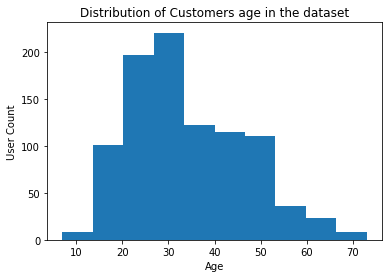

In [6]:
users['age'].plot.hist()
plt.title("Distribution of Customers age in the dataset")
plt.xlabel("Age")
plt.ylabel("User Count")
plt.show()

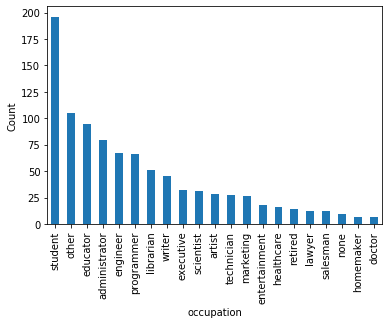

In [7]:
users['occupation'].value_counts().plot.bar()
plt.xlabel('occupation')
plt.ylabel('Count')
plt.show()

In [8]:
# reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols,
encoding='latin-1')
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


This dataset contains attributes of 1682 movies. There are 24 columns out of which last 19 columns specify the genre of a particular movie. These are binary columns, i.e., a value of 1 denotes that the movie belongs to that genre, and 0 otherwise.

In [9]:
items.shape

(1682, 24)

In [10]:
print(f"Number of Movies in the Movie Information dataframe: {items['movie id'].nunique()}")

Number of Movies in the Movie Information dataframe: 1682


In [11]:
# reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
ratings.shape

(100000, 4)

In [13]:
n_users = ratings.user_id.nunique()
n_items = ratings.movie_id.nunique()
print(f"There are {n_users} unique users in the ratings dataframe")
print(f"There are {n_items} unique movies in the ratings dataframe")

There are 943 unique users in the ratings dataframe
There are 1682 unique movies in the ratings dataframe


In [14]:
#Load train and test from ratings dataframe separately.
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [15]:
data_matrix = np.zeros((n_users, n_items))

In [16]:
data_matrix.shape

(943, 1682)

In [17]:
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

In [18]:
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [19]:
user_similarity.shape

(943, 943)

In [20]:
item_similarity.shape

(1682, 1682)

In [21]:
data_matrix.shape

(943, 1682)

In [22]:
'''Our goal is to find a prediction matrix which is in the shape of (user, item) either based on 
user similarity(user - user collbrative filtering) or based on item similarity(item-tem collbrative filtering)'''
def predict(rating_matrix, similarity, prediction_type='user'):
    #For a given item and user, take weighted average rating based on the users similarity.
    #do thst for all items for single user
    #do that for all users
    if prediction_type == 'user':
        mean_user_ratings = rating_matrix.mean(axis=1)
        ratings_diff = rating_matrix - mean_user_ratings[:, np.newaxis]
        pred = mean_user_ratings[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T        
    #For a given item and user, assuming a user clicks an item, take weighted average rating for based on that items similarity
    #with other items
    #do that 
    elif prediction_type == 'item':
        pred = rating_matrix.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    print (pred.shape)
    return pred

In [23]:
item_prediction = predict(data_matrix, item_similarity, prediction_type='item')
user_prediction = predict(data_matrix, user_similarity, prediction_type='user')

(943, 1682)
(943, 1682)


In [24]:
train_data = tc.SFrame(ratings_train)
test_data = tc.SFrame(ratings_test)

In [25]:
train_data.print_rows(num_rows=15, num_columns=4) 

+---------+----------+--------+----------------+
| user_id | movie_id | rating | unix_timestamp |
+---------+----------+--------+----------------+
|    1    |    1     |   5    |   874965758    |
|    1    |    2     |   3    |   876893171    |
|    1    |    3     |   4    |   878542960    |
|    1    |    4     |   3    |   876893119    |
|    1    |    5     |   3    |   889751712    |
|    1    |    6     |   5    |   887431973    |
|    1    |    7     |   4    |   875071561    |
|    1    |    8     |   1    |   875072484    |
|    1    |    9     |   5    |   878543541    |
|    1    |    10    |   3    |   875693118    |
|    1    |    11    |   2    |   875072262    |
|    1    |    12    |   5    |   878542960    |
|    1    |    13    |   5    |   875071805    |
|    1    |    14    |   5    |   874965706    |
|    1    |    15    |   5    |   875071608    |
+---------+----------+--------+----------------+
[90570 rows x 4 columns]



In [26]:
popularity_model = tc.popularity_recommender.create(train_data, user_id = 'user_id', item_id = 'movie_id', target='rating')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.093158s

90570 observations to process; with 1680 unique items.

In [27]:
popularity_recommed = popularity_model.recommend(users=[1,2,3,4,5], k=5)

In [28]:
popularity_recommed.print_rows(num_rows=25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1599   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1599   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1599   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1599   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1599   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

In [29]:
#Item-Item Collbrative filtering Model
item_item_cfm = tc.item_similarity_recommender.create(train_data, user_id = 'user_id', item_id = 'movie_id', target='rating')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.072346s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.151ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 7.841ms                             | 0.25             | 6               |

In [30]:
item_cfm_recommendations = item_item_cfm.recommend(users=[1,2,3,4,5], k=6)

| 122.719ms                           | 100              | 1680            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.13087s

In [31]:
item_cfm_recommendations.print_rows(num_rows = 30)

+---------+----------+---------------------+------+
| user_id | movie_id |        score        | rank |
+---------+----------+---------------------+------+
|    1    |   423    | 0.16592604968384023 |  1   |
|    1    |   568    |  0.1551880854686708 |  2   |
|    1    |   202    | 0.15202070260775907 |  3   |
|    1    |   403    | 0.14992555953164138 |  4   |
|    1    |   385    | 0.14952385562066814 |  5   |
|    1    |   655    | 0.13876477748383093 |  6   |
|    2    |    7     |  0.1617042330595163 |  1   |
|    2    |   121    |  0.1599736248071377 |  2   |
|    2    |    50    | 0.15925778792454645 |  3   |
|    2    |   181    | 0.15784773574425623 |  4   |
|    2    |   117    | 0.15463673839202294 |  5   |
|    2    |   405    | 0.14554836887579697 |  6   |
|    3    |   328    | 0.12468654459173029 |  1   |
|    3    |   313    |  0.1013359698382291 |  2   |
|    3    |   332    | 0.10127936574545773 |  3   |
|    3    |    12    | 0.10076934911987999 |  4   |
|    3    | 

In [32]:
data_matrix.shape

(943, 1682)

In [33]:
len(data_matrix.nonzero()[1])

100000

In [34]:
class MatrixFactorization:
    def __init__(self, rating_matrix, latent_features_count, alpha, beta, iterations):
        # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
        self.R = rating_matrix
        self.num_users, self.num_items = rating_matrix.shape
        self.K = latent_features_count
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
    #Initializing user-feature and movie-feature matrix
    def train(self):
        self.U = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.I = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        #Initailizing a bias term
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        #list of training samples
        self.samples = [(i, j, self.R[i, j]) for i in range(self.num_users) for j in range(self.num_items) if self.R[i, j]>0]
        
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            
            #forward and backward propogation
            self.sgd()
            
            #calculate mean sqaured error
            mse = self.mse()
            
            training_process.append((i, mse))
            
            if (i + 1 ) % 5 == 0:
                print(f"iteration: {i+1}, error: {mse}")
                
        return training_process
        
    def get_rating(self, i , j):
        #Predicted rating for User i and Movie J
        predicted_individual_rating = self.b + self.b_u[i] + self.b_i[j] + self.U[i, :].dot(self.I[j, :].T)
        return predicted_individual_rating
        
    def sgd(self):
        #Stohastic Gradient descent to get optimized P and Q matrix
        for i, j, r in self.samples:
            predicted_individual_rating = self.get_rating(i, j)
            e = r - predicted_individual_rating
            
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            #Updating user affinity matrix
            self.U[i, :] += self.alpha * (e * self.I[j, :] - self.beta * self.U[i, :])
            self.I[j, :] += self.alpha * (e * self.U[i, :] - self.beta * self.I[j, :])
    
    def full_matrix(self):
        return mf.U.dot(self.I.T) + mf.b_u[:, np.newaxis] + mf.b_i[np.newaxis, :] + mf.b
        
            
    def mse(self):
        #calculating mean squared error
        
        #Returns non zero index positions
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        
        error = 0
        
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        #error = error / len(xs)
        return np.sqrt(error)


In [35]:
rating_matrix = np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [36]:
rating_matrix.shape

(943, 1682)

In [39]:
mf = MatrixFactorization(rating_matrix=rating_matrix, latent_features_count=20, alpha=0.001, beta=0.01, iterations=100)

In [40]:
training_process =  mf.train()

iteration: 5, error: 312.1014298250792
iteration: 10, error: 302.9143600119332
iteration: 15, error: 298.67351624000867
iteration: 20, error: 296.10904938075913
iteration: 25, error: 294.34217814197075
iteration: 30, error: 293.01892773332105
iteration: 35, error: 291.9578891535768
iteration: 40, error: 291.0514948775287
iteration: 45, error: 290.22434365588043
iteration: 50, error: 289.42198899369487
iteration: 55, error: 288.5939303956137
iteration: 60, error: 287.6907023867008
iteration: 65, error: 286.66537064804214
iteration: 70, error: 285.46888795280336
iteration: 75, error: 284.0540095598154
iteration: 80, error: 282.38630616324275
iteration: 85, error: 280.4500621888854
iteration: 90, error: 278.25682192793647
iteration: 95, error: 275.84665461536724
iteration: 100, error: 273.27442288070097


In [41]:
print()
print("U x I:")
print(mf.full_matrix())
print()


U x I:
[[3.89502438 3.24438947 3.22707405 ... 3.3208948  3.50396107 3.36555579]
 [3.92196763 3.3452992  3.08738986 ... 3.37176667 3.50248447 3.4328983 ]
 [3.42137962 2.71725903 2.64848269 ... 2.7920821  2.95124783 2.84385084]
 ...
 [4.21215629 3.61181052 3.40966779 ... 3.658758   3.76858682 3.73385234]
 [4.33627525 3.80151375 3.53240249 ... 3.80797017 3.89780189 3.87668019]
 [3.88195123 3.16053373 3.02580655 ... 3.2269225  3.38653078 3.31251194]]

